In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
import matplotlib.pyplot as plt
from skimage import io
from skimage.filters.rank import entropy
from skimage.morphology import disk
import numpy as np
from skimage.filters import threshold_otsu


import glob


time= 0 hr   Scratch area= 33426 pix²
time= 1 hr   Scratch area= 27683 pix²
time= 2 hr   Scratch area= 24106 pix²
time= 3 hr   Scratch area= 18481 pix²
time= 4 hr   Scratch area= 16105 pix²
time= 5 hr   Scratch area= 14417 pix²
time= 6 hr   Scratch area= 12717 pix²
time= 7 hr   Scratch area= 10957 pix²
time= 8 hr   Scratch area= 9337 pix²


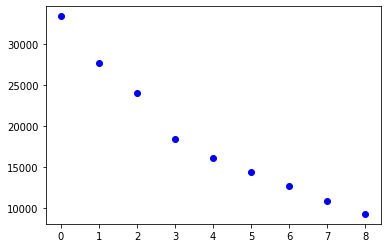

In [3]:
time = 0
time_list=[]
area_list=[]
path = "/content/gdrive/My Drive/CVG/Scratch/*.*"
for file in glob.glob(path):
    dict={}
    img=io.imread(file)
    entropy_img = entropy(img, disk(3))
    thresh = threshold_otsu(entropy_img)
    binary = entropy_img <= thresh
    scratch_area = np.sum(binary == 1)
    print("time=", time, "hr  ", "Scratch area=", scratch_area, "pix\N{SUPERSCRIPT TWO}")
    time_list.append(time)
    area_list.append(scratch_area)
    time += 1

#print(time_list, area_list)
plt.plot(time_list, area_list, 'bo')  #Print blue dots scatter plot


In [4]:
#Print slope, intercept
from scipy.stats import linregress
#print(linregress(time_list, area_list))


slope, intercept, r_value, p_value, std_err = linregress(time_list, area_list)
print("y = ",slope, "x", " + ", intercept  )
print("R\N{SUPERSCRIPT TWO} = ", r_value**2)
#print("r-squared: %f" % r_value**2)

y =  -2889.6000000000004 x  +  30139.4
R² =  0.9360942608727407
